In [53]:
import numpy as np
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SimpleRNN, Bidirectional, Dropout
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [55]:
# Завантаження та підготовка даних
max_features = 10000
maxlen = 500

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [24]:
# Функція для створення графіків
def plot_history(history, title):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
    
    # График точності
    ax1.plot(history.history['accuracy'], label='train accuracy')
    ax1.plot(history.history['val_accuracy'], label='val accuracy')
    ax1.set_title(f'{title} - Accuracy')
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.legend()
    
    # График втрат
    ax2.plot(history.history['loss'], label='train loss')
    ax2.plot(history.history['val_loss'], label='val loss')
    ax2.set_title(f'{title} - Loss')
    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

In [59]:
# Функція для створення та навчання моделі
def train_model(model, name):
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)
    score = model.evaluate(x_test, y_test)
    print(f"{name} - Test accuracy: {score[1]:.4f}")
    plot_history(history, name)
    return history

In [63]:
# Проста RNN
def simple_rnn_model():
    model = Sequential([
        Embedding(max_features, 32),
        SimpleRNN(32, return_sequences=True),
        Dropout(0.3),
        SimpleRNN(32),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    return model

In [65]:
# LSTM
def lstm_model():
    model = Sequential([
        Embedding(max_features, 32),
        LSTM(32, return_sequences=True),
        Dropout(0.3),
        LSTM(32),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    return model

In [67]:
# Двостороння LSTM
def bidirectional_lstm_model():
    model = Sequential([
        Embedding(max_features, 32),
        Bidirectional(LSTM(32, return_sequences=True)),
        Dropout(0.3),
        Bidirectional(LSTM(32)),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    return model

In [69]:
# Глибока LSTM
def deep_lstm_model():
    model = Sequential([
        Embedding(max_features, 32),
        LSTM(32, return_sequences=True),
        Dropout(0.3),
        LSTM(32, return_sequences=True),
        Dropout(0.3),
        LSTM(32),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    return model


Training Simple RNN...
Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 86ms/step - accuracy: 0.5579 - loss: 0.6826 - val_accuracy: 0.8094 - val_loss: 0.4259
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 83ms/step - accuracy: 0.8461 - loss: 0.3761 - val_accuracy: 0.5892 - val_loss: 0.6766
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 84ms/step - accuracy: 0.7754 - loss: 0.4647 - val_accuracy: 0.8512 - val_loss: 0.3772
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 84ms/step - accuracy: 0.9217 - loss: 0.2181 - val_accuracy: 0.8490 - val_loss: 0.3984
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 81ms/step - accuracy: 0.9546 - loss: 0.1406 - val_accuracy: 0.8458 - val_loss: 0.4436
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 84ms/step - accuracy: 0.9732 - loss: 0.0898 - val_accuracy: 0.8450 - val_loss: 0.5377
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 84ms/step - accuracy: 0.9857 - loss: 0.0498 - val_accuracy: 0.8188 - val_loss: 0.6201
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 84ms/step - accuracy: 

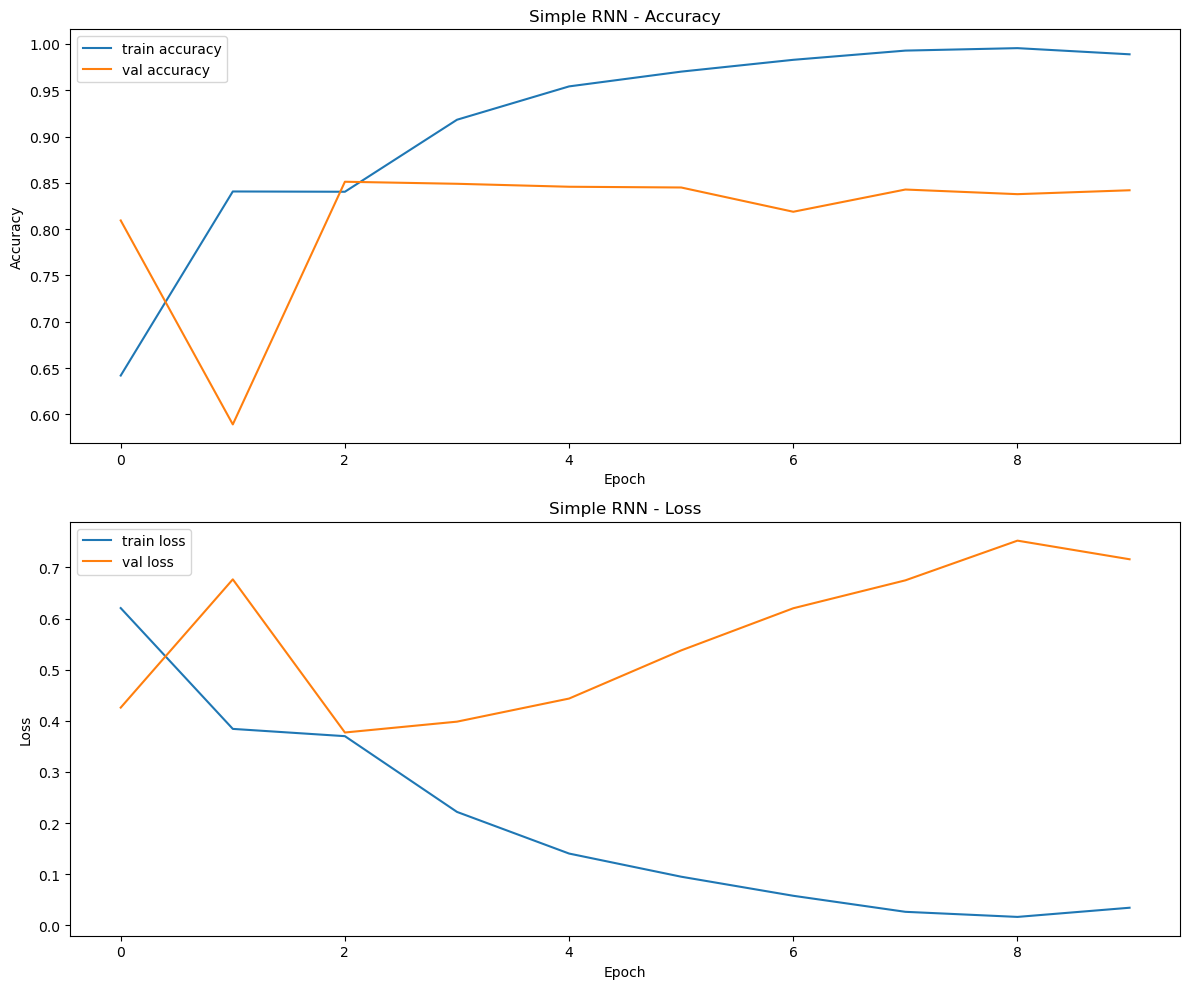


Training LSTM...
Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 28s 171ms/step - accuracy: 0.6299 - loss: 0.6238 - val_accuracy: 0.7766 - val_loss: 0.4529
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 27s 169ms/step - accuracy: 0.8585 - loss: 0.3483 - val_accuracy: 0.8776 - val_loss: 0.3134
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 27s 169ms/step - accuracy: 0.9149 - loss: 0.2306 - val_accuracy: 0.8798 - val_loss: 0.3067
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 27s 169ms/step - accuracy: 0.9401 - loss: 0.1700 - val_accuracy: 0.8718 - val_loss: 0.3208
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 27s 171ms/step - accuracy: 0.9529 - loss: 0.1377 - val_accuracy: 0.8664 - val_loss: 0.3436
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 26s 169ms/step - accuracy: 0.9597 - loss: 0.1179 - val_accuracy: 0.8698 - val_loss: 0.3907
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 26s 167ms/step - accuracy: 0.9737 - loss: 0.0846 - val_accuracy: 0.8698 - val_loss: 0.3936
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 27s 170ms/step - accuracy

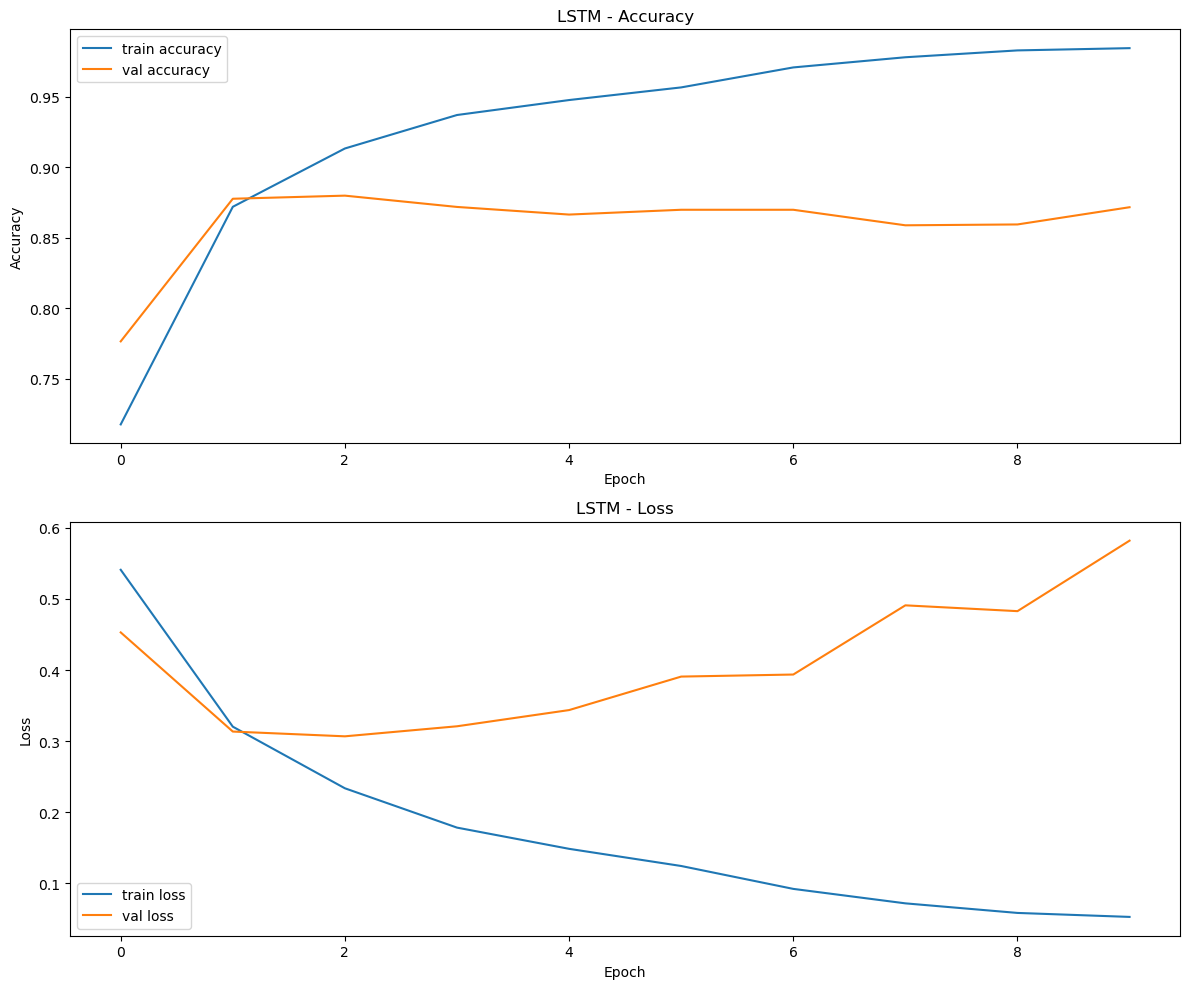


Training Bidirectional LSTM...
Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 39s 229ms/step - accuracy: 0.6380 - loss: 0.6007 - val_accuracy: 0.8618 - val_loss: 0.3301
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 36s 230ms/step - accuracy: 0.9071 - loss: 0.2492 - val_accuracy: 0.8084 - val_loss: 0.4112
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 36s 227ms/step - accuracy: 0.9205 - loss: 0.2229 - val_accuracy: 0.8780 - val_loss: 0.3568
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 37s 235ms/step - accuracy: 0.9572 - loss: 0.1297 - val_accuracy: 0.8616 - val_loss: 0.3666
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 36s 226ms/step - accuracy: 0.9710 - loss: 0.0965 - val_accuracy: 0.8726 - val_loss: 0.4028
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 37s 233ms/step - accuracy: 0.9786 - loss: 0.0748 - val_accuracy: 0.8716 - val_loss: 0.4299
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 36s 230ms/step - accuracy: 0.9755 - loss: 0.0744 - val_accuracy: 0.8614 - val_loss: 0.4813
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 36s 232ms/s

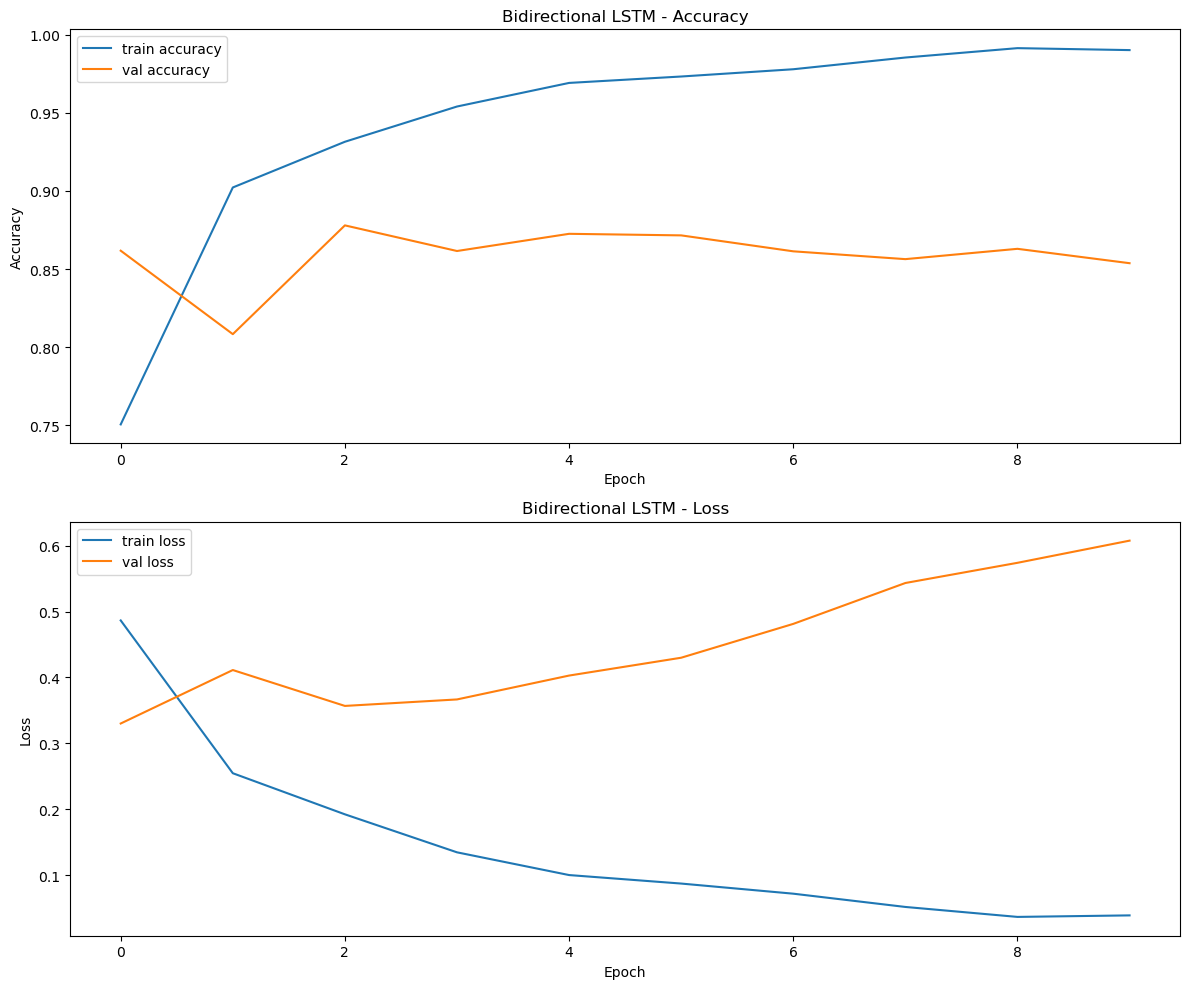


Training Deep LSTM...
Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 43s 259ms/step - accuracy: 0.6490 - loss: 0.5870 - val_accuracy: 0.8398 - val_loss: 0.3787
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 40s 256ms/step - accuracy: 0.9067 - loss: 0.2550 - val_accuracy: 0.8550 - val_loss: 0.3408
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 40s 254ms/step - accuracy: 0.9290 - loss: 0.2001 - val_accuracy: 0.8756 - val_loss: 0.3130
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 259ms/step - accuracy: 0.9510 - loss: 0.1441 - val_accuracy: 0.8554 - val_loss: 0.3664
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 40s 257ms/step - accuracy: 0.9566 - loss: 0.1255 - val_accuracy: 0.8732 - val_loss: 0.4082
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 40s 257ms/step - accuracy: 0.9757 - loss: 0.0799 - val_accuracy: 0.8704 - val_loss: 0.4336
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 40s 257ms/step - accuracy: 0.9803 - loss: 0.0688 - val_accuracy: 0.8654 - val_loss: 0.5530
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 40s 257ms/step - acc

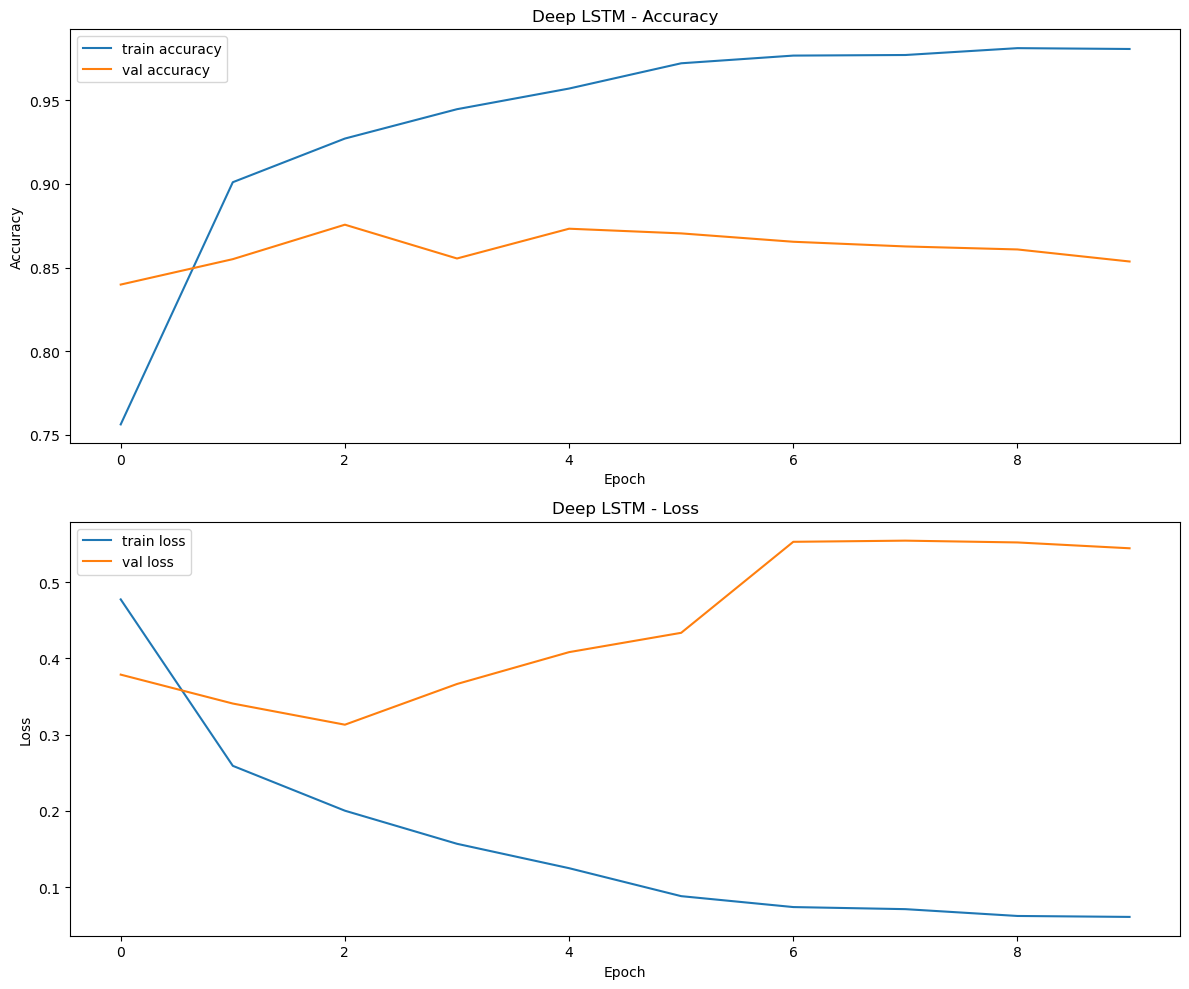

In [71]:
# Навчання моделей
models = [
    (simple_rnn_model(), "Simple RNN"),
    (lstm_model(), "LSTM"),
    (bidirectional_lstm_model(), "Bidirectional LSTM"),
    (deep_lstm_model(), "Deep LSTM")
]

histories = {}
for model, name in models:
    print(f"\nTraining {name}...")
    histories[name] = train_model(model, name)


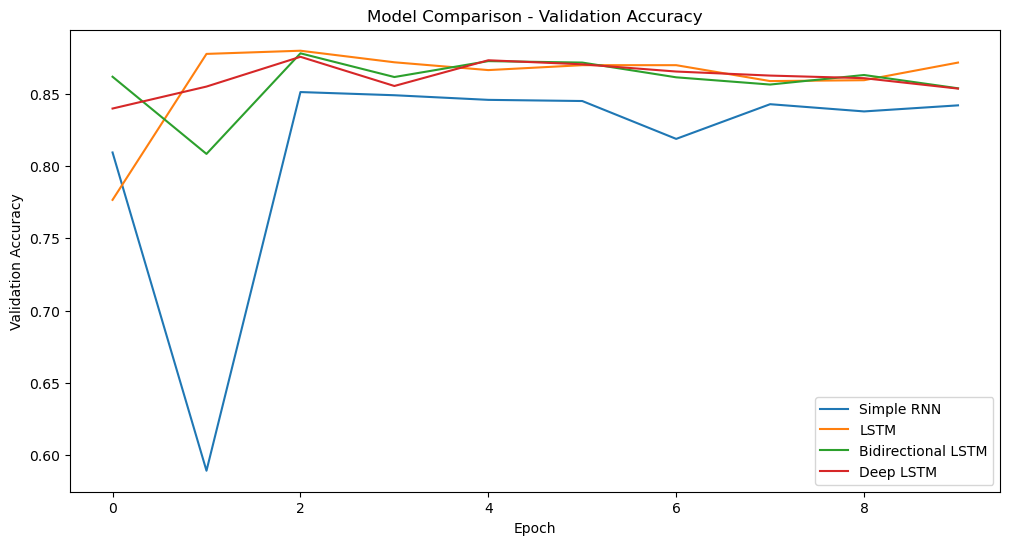

In [72]:
# Порівняння моделей
plt.figure(figsize=(12, 6))
for name, history in histories.items():
    plt.plot(history.history['val_accuracy'], label=name)
plt.title('Model Comparison - Validation Accuracy')
plt.ylabel('Validation Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

### Висновки

LSTM, Bidirectional LSTM та Deep LSTM показують схожу і високу продуктивність, досягаючи точності валідації близько 84-85%.

Simple RNN значно відстає від інших моделей, демонструючи нижчу і менш стабільну точність, а також показує значну нестабільність, особливо на ранніх епохах.

LSTM та її варіації (Bidirectional, Deep) показують себе набагато ефективніше та стабільніше, ніж проста RNN для цього завдання. Різниця між різними варіантами LSTM незначна, що може вказувати на те, що для даного завдання достатньо базової LSTM для економії обчислювальних ресурсів.